# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'

data = pd.read_csv(arquivo)
#print (data)
df1 = data.drop(columns=['state', 'area_code', 'phone_number'])
print (df1)


      account_length intl_plan voice_mail_plan  number_vmail_messages  \
0                128        no             yes                     25   
1                107        no             yes                     26   
2                137        no              no                      0   
3                 84       yes              no                      0   
4                 75       yes              no                      0   
5                118       yes              no                      0   
6                121        no             yes                     24   
7                147       yes              no                      0   
8                117        no              no                      0   
9                141       yes             yes                     37   
10                65        no              no                      0   
11                74        no              no                      0   
12               168        no              no     

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [8]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

lb = LabelBinarizer()
#stdSc = StandardScaler()StratifiedShuffleSplit
scaler = MinMaxScaler()

for column in bin_cols:
    df1[column] = lb.fit_transform(df1[column])

#df1[df1.columns] = stdSc.fit_transform(df1)
df1[df1.columns] = scaler.fit_transform(df1)

print (df1)
#df[:10]


      account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0           0.524793        0.0              1.0               0.480769   
1           0.438017        0.0              1.0               0.500000   
2           0.561983        0.0              0.0               0.000000   
3           0.342975        1.0              0.0               0.000000   
4           0.305785        1.0              0.0               0.000000   
5           0.483471        1.0              0.0               0.000000   
6           0.495868        0.0              1.0               0.461538   
7           0.603306        1.0              0.0               0.000000   
8           0.479339        0.0              0.0               0.000000   
9           0.578512        1.0              1.0               0.711538   
10          0.264463        0.0              0.0               0.000000   
11          0.301653        0.0              0.0               0.000000   
12          0.690083     

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [11]:
x_cols = [x for x in df1.columns if x != 'churned']

X_data = df1[x_cols]
y_data = df1['churned']


In [12]:

from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors = 3)
kNN_classifier.fit(X_data, y_data)
predicted_dataset = kNN_classifier.predict(X_data)


## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [13]:
#from functools import reduce
def accuracy(real, predict):
#    return "datasets do not have the same length." if len(real) != len(predict) else reduce(lambda x, y: x + y, map(lambda tup: 1 if tup[0] == tup[1] else 0, zip(y_data, predict))) / len(real)

#accuracy(y_data, predicted_dataset)
    correct = 0
    for i in range(len(real)):
        if real[i] == predict[i]:
            correct += 1
    return correct / len(real)

accuracy(y_data, predicted_dataset)

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [14]:
kNN_inverse_distance_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
kNN_inverse_distance_classifier.fit(X_data, y_data)
predicted_dataset_by_inverse_distance = kNN_inverse_distance_classifier.predict(X_data)

print(f"Acurácia da predição pelo inverso da distância: {accuracy(y_data, predicted_dataset_by_inverse_distance)}")

kNN_manhattan_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', p = 1)
kNN_manhattan_classifier.fit(X_data, y_data)
predicted_dataset_by_manhattan_distance = kNN_manhattan_classifier.predict(X_data)

print(f"Acurácia da predição pela distância de Manhattan: {accuracy(y_data, predicted_dataset_by_manhattan_distance)}")


Acurácia da predição pelo inverso da distância: 1.0
Acurácia da predição pela distância de Manhattan: 0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [15]:
score_list = list()

'''escreva no bloco abaixo'''
for k in range (1, 21):
    kNN_classifier = KNeighborsClassifier(n_neighbors = k)
    kNN_classifier.fit(X_data, y_data)
    predicted_dataset = kNN_classifier.predict(X_data)
    score_list.append((k, accuracy(y_data, predicted_dataset)))
'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df


,k,accuracy
0,1,1.0000
1,2,0.9292
2,3,0.9422
3,4,0.9154
4,5,0.9284
5,6,0.9156
6,7,0.9254
7,8,0.9122
8,9,0.9224
9,10,0.9092


In [16]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


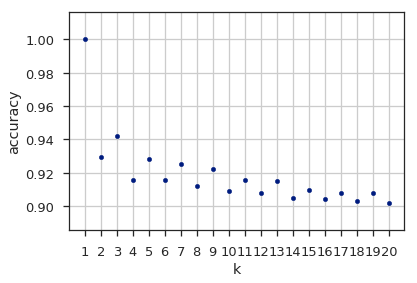

In [17]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.plot(x = 'k', y = 'accuracy', kind = 'scatter', grid = True)

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));
